# Numerical Interpolation
#### Computational Physics
#### Dr. Zhibo Zhang, Physics Department

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In numerical analysis, the results obtained from computations are always approximations of the desired quantities and in most cases are within some uncertainties. This is similar to experimental observations in physics. Every single physical quantity measured carries some experimental error. We constantly encounter situations in which we need to interpolate a set of discrete data points or to fit them to an adjustable curve. It is extremely important for a physicist to be able to draw conclusions based on the information available and to generalize the knowledge gained in order to predict new phenomena.
    
Interpolation is needed when we want to infer some local information from a set of incomplete or discrete data. Overall approximation or fitting is needed when we want to know the general or global behavior of the data. For ex- ample, if the speed of a baseball is measured and recorded every 1/100 of a second, we can then estimate the speed of the baseball at any moment by interpolating the recorded data around that time. If we want to know the overall trajectory, then we need to fit the data to a curve. In this section, we will learn some very basic interpolation schemes and illustrate how to use them in physics.

In math, the problem of interpolation is as follows:
* You know (or are given) the values of a function $f(x)$ at $x_{0 },x_{1 },x_{2},...x_{N }$, where $x_{0}$ is the smallest and $x_{N }$ is the largest
* You want to know the value of $f(x)$ at a set of $x'$, e.g., $x'_{0 },x'_{1 },x'_{2},...x'_{K }$ that are in-between $x_{0}$ and $x_{N}$


#### scipy interpolate module interp1d
Although the basic concept of numerical interpolation is simple, writing a generic code can be quite difficulat. Fortunately,   `Scipy`  package has a interpolation module we can use. It is **scipy.interpolate.interp1d**. 


In [2]:
from  scipy.interpolate import interp1d
#help(interp1d)

###A Simple Example


Using your Monte Carlo radiative transer code, you computed the cloud reflectance $R$ for a non-absorptive cloud ($\omega=1$) at 5 cloud optical thicknesses. $\tau$ = [0.3,        4.28,   8.26,  12.24,   16.22], $R$ = [0.18,  0.76,  0.86,  0.90,  0.92] . Then, you want to know the cloud refletances for $\tau$ from 0.4 to 16.0 with 0.1 inerval. 


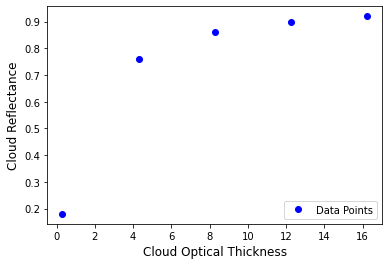

In [3]:
def ref_data():
    tau = [0.3, 4.28, 8.26, 12.24, 16.22]
    R   =  [0.18, 0.76, 0.86, 0.90, 0.92]
    return tau,R

tau_data,R_data = ref_data()
fig,ax = plt.subplots()
ax.plot(tau_data,    R_data,   'bo',  label='Data Points')
plt.legend(loc='lower right')
ax.set_xlabel('Cloud Optical Thickness',fontsize='large')   
ax.set_ylabel('Cloud Reflectance',fontsize='large')                   
plt.show()


---

## 1 Piecewise Linear Interpolation

The simplest way to obtain the approximation of estimating $f(x)$ in-between two points $x_{i }$ and $ x_{i+1}$ is simply to draw a straight line between the two points. This is basically ** (1D) Linear Interpolation **. 

Mathematically, linear interpolation is to use a linear function $g(x) = a_{0} + a_{1}x$ that passes through $x_{i }$ and $ x_{i+1}$ to estimate any $x$ value between $x_{i }$ and $ x_{i+1}$. Note that the coefficient $a_{0}$  and $a_{1}$ are solved from $g(x_{i }) =y_{i }$ and  $g(x_{i +1}) =y_{i+1 }$


To use linear interpolation in interp1d, set the keyword **kind='linear'** (actually the default value)

157


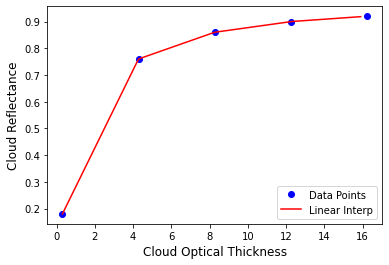

In [4]:
tau_interp = np.arange(0.3,16.0,0.1)
f_linear   = interp1d(tau_data,R_data,kind='linear')
R_linear = f_linear(tau_interp)
print(tau_interp.size)
fig,ax = plt.subplots()
ax.plot(tau_data,    R_data,   'bo',  label='Data Points')
ax.plot(tau_interp,    R_linear,   'r-',  label='Linear Interp')
plt.legend(loc='lower right')
ax.set_xlabel('Cloud Optical Thickness',fontsize='large')   
ax.set_ylabel('Cloud Reflectance',fontsize='large')                   
plt.show()

**Pros and Cons of linear interpolation:**

* Pros: simple, fast, predictable results
* Cons: large error for nonlinear data

---

## 2 Lagrange Polynomial interpolation

In the linear interpolation,we use two adjacent data points for the interpolation and simply draw a straight line (linear) between them. Alternatively , we can construct a non-linear function that passes through all the points, i.e., a non-linear interpolation of the data. For example, we can use the so-called Lagrange polynomial to pass through all the given points. For a given set of distinct points [$x_{0 },x_{1 },x_{2},...x_{N }$] and numbers [$y_{0 },y_{1 },y_{2},...y_{N }$], the Lagrange polynomial is the polynomial of the least degree that at each point $x_{i } $ assumes the corresponding value $y_{i } $ (i.e. passing through all points). A brief introduction to Lagrange polynomial is given below

* For a given a data set of $n$+1 points [$y_{0 },y_{1 },y_{2},...y_{i}=f(x_{i}),...,y_{N }$] at points [$x_{0 },x_{1 },x_{2},...x_{N }$] (note $x_{i}$ have to be unique)
* There is a unique polynomial $p_{n}(x)$ of order $n$, that passes through all n+1 points : 

$$
\begin{align}
{{p}_{n}}(x)={{a}_{0}}+{{a}_{1}}x+{{a}_{2}}{{x}^{2}} +{{a}_{n}}{{x}^{n}}
\end{align}
$$

* To find such polynomial, we need to determine the coefficients [$a_{0 },a_{1 },a_{2},...,a_{N }$] from the given data. Basically, we need to solve the following $n$+1 equations

$$
\begin{align}
\ {{p}_{n}}(x_{0})={{a}_{0}}+{{a}_{1}}x_{0}+{{a}_{2}}{{x_{0}}^{2}} +{{a}_{n}}{{x_{0}}^{n}} = y_{0} \\
\ {{p}_{n}}(x_{1})={{a}_{0}}+{{a}_{1}}x_{1}+{{a}_{2}}{{x_{1}}^{2}} +{{a}_{n}}{{x_{1}}^{n}} = y_{1} \\
\ ... ...\\
\ {{p}_{n}}(x_{n})={{a}_{0}}+{{a}_{1}}x_{n}+{{a}_{2}}{{x_{n}}^{2}} +{{a}_{n}}{{x_{n}}^{n}} = y_{n} \\
\end{align}
$$

* The famous mathematician and physicist, *Joseph Louis Lagrange*, proved that the polynomial we are looking for  $ {p}_{n}(x) $ can be constructed from the following equations:

$$
\begin{align}
{{p}_{n}}(x)=\sum\limits_{i=0}^{n}{{y_{i}{L}_{i}}(x)}
\end{align}
$$

* where 

$$
\begin{align}
{{L}_{i}}(x)=\prod\limits_{k=0,k\ne i}^{n}{\frac{\left( x-{{x}_{k}} \right)}{\left( {{x}_{i}}-{{x}_{k}} \right)}}=\frac{\left( x-{{x}_{0}} \right)}{\left( {{x}_{i}}-{{x}_{0}} \right)}\frac{\left( x-{{x}_{1}} \right)}{\left( {{x}_{i}}-{{x}_{1}} \right)}\cdots \frac{\left( x-{{x}_{i-1}} \right)}{\left( {{x}_{i}}-{{x}_{i-1}} \right)}\frac{\left( x-{{x}_{i+1}} \right)}{\left( {{x}_{i}}-{{x}_{i+1}} \right)}\cdots \frac{\left( x-{{x}_{n}} \right)}{\left( {{x}_{i}}-{{x}_{n}} \right)}
\end{align}
$$

* It is not difficult to see that $L_{i}({x_{i}} )= 1 $ and for all $ i\neq j$, $L_{i}({x_{j}} )= 0 $ 


#### Example 
We wish to interpolate ƒ(x) = x^{2} over the range 1 ≤ x ≤ 3, given these three points:

\begin{align}
x_0 & = 1 & & & f(x_0) & = 1 \\
x_1 & = 2 & & & f(x_1) & = 4 \\
x_2 & = 3 & & & f(x_2) & =9.
\end{align}
The interpolating polynomial is:
 \begin{align}
L(x) &= {1}\cdot{x - 2 \over 1 - 2}\cdot{x - 3 \over 1 - 3}+{4}\cdot{x - 1 \over 2 - 1}\cdot{x - 3 \over 2 - 3}+{9}\cdot{x - 1 \over 3 - 1}\cdot{x - 2 \over 3 - 2} \\[10pt]
&= x^2.
\end{align} 



**For Lagrange polynomial interpolation we need to use the module  "scipy.interpolate.lagrange"**

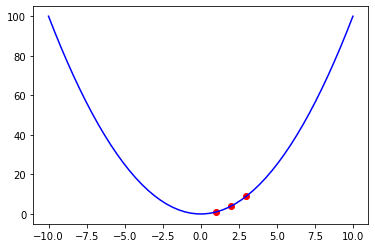

In [5]:
from scipy.interpolate import lagrange
#help(lagfit)
x = np.array([1.0,2.0,3.0])
y = np.array([1.0,4.0,9.0])
P =  lagrange(x,y)

xp = np.linspace(-10,10)

plt.plot(x,y,'ro')
plt.plot(xp,P(xp),'b-')
plt.show()


Now let go back to our exmaple about cloud reflectance

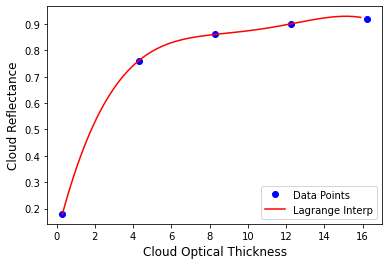

In [6]:
P_Lagrange =lagrange(tau_data,R_data)
R_lagrange =P_Lagrange(tau_interp)

fig,ax = plt.subplots()
ax.plot(tau_data,    R_data,   'bo',  label='Data Points')
ax.plot(tau_interp,    R_lagrange,   'r-',  label='Lagrange Interp')
plt.legend(loc='lower right')
ax.set_xlabel('Cloud Optical Thickness',fontsize='large')   
ax.set_ylabel('Cloud Reflectance',fontsize='large')                   
plt.show()

**Limiations of Lagrange interpolation:**

Lagrange interpolation is essentially high-degree-polynomial fit. It is guaranteed to pass through all the data points, but the results can be unrealitic, e.g., high-frequency oscillation (Runge's phenomeno).  The textbooka gives an example when  Lagrange interpolation goes wrong.

####Example (from textbook section 8.5.1)
Thecrosssectionsmeasuredfortheresonantscatteringofaneutronfromanucleus are given below along with the measurement number (index), the energy. Your problem is to determine values for the cross sections at energy values lying between those in the table.

E = [0, 25, 50, 75, 100, 125, 150, 175, 200]

C = [10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7]

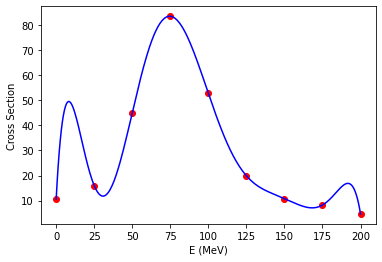

In [7]:
E = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
C = np.array( [10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

E_interp = np.linspace(0,200.,300)
f =lagrange(E,C)
C_interp =f(E_interp)


fig,ax = plt.subplots()
ax.plot(E,C,'ro')
ax.set_xlabel('E (MeV)')
ax.set_ylabel('Cross Section')
ax.plot(E_interp,C_interp,'b')
plt.show()


This example shows how easy it is to go wrong with a high-degree-polynomial fit. Although the polynomial is guaranteed to pass through all the data points, the representation of the function away from these points can be quite unrealistic.

---

## 3 Spline Method

Similar to Lagrange interpolation, Spline method also use polynomialsto interpolation data. The difference is that the Spline method uses low-order  (e.g., quadratic ro cubic) polynomial to interpolate the data piecewise. Spline interpolation is often preferred over polynomial interpolation because the interpolation error can be made small even when using low degree polynomials for the spline. Spline interpolation avoids the problem of Runge's phenomenon, in which oscillation can occur between points when interpolating using high degree polynomials.


#### Derivation of Quadratic Spline
* For a given a data set of $n$+1 points [$y_{0 },y_{1 },y_{2},...y_{i}=f(x_{i}),...,y_{N }$] at points [$x_{0 },x_{1 },x_{2},...x_{N }$] (note $x_{i}$ have to be unique)
* To do quadratic spline interpolation, we need to find $n$ quadratic "splines" each passing two adjacent data points:

$$
\begin{align}
  & {{a}_{1}}{{x}^{2}}+{{b}_{1}}x+{{c}_{1}};\text{   }{{x}_{0}}\le x\le {{x}_{1}} \\ 
 & {{a}_{2}}{{x}^{2}}+{{b}_{2}}x+{{c}_{2}};\text{   }{{x}_{1}}\le x\le {{x}_{2}} \\ 
 & \vdots  \\ 
 & {{a}_{n}}{{x}^{2}}+{{b}_{n}}x+{{c}_{n}};\text{   }{{x}_{n-1}}\le x\le {{x}_{n}} \\ 
\end{align} 
$$

* To find these spines, we need to determine $a_{i},b_{i},c_{i}, i=1...,n $, a totoal of $3n$ coefficients. There are some rules to follow. 1) These coefficients need to make sure that the splines to go through all data points, which gives us $2n$ equations. 

$$
\begin{align}
  & {{a}_{1}}x_{0}^{2}+{{b}_{1}}{{x}_{0}}+{{c}_{1}}={{y}_{0}};{{a}_{1}}x_{1}^{2}+{{b}_{1}}{{x}_{1}}+{{c}_{1}}={{y}_{1}}\\ 
 & \vdots  \\ 
 & {{a}_{n}}x_{n-1}^{2}+{{b}_{n}}{{x}_{n-1}}+{{c}_{n}}={{y}_{n-1}};{{a}_{n}}x_{n}^{2}+{{b}_{n}}{{x}_{n}}+{{c}_{n}}={{y}_{n}} \\ 
\end{align}
$$


* The other condistions come from the other requirement on the spline, i.e., we want the interpolated curve to be smooth, which requires that the slope of two adjacent spline at the joint is equal. For example, the derivative of 1st spline is  $f'(x)=2{{a}_{1}}x+{{b}_{1}}$ and the the derivative of 2nd spline is  $f'(x)=2{{a}_{2}}x+{{b}_{2}}$ . We want them to be equal at the data point [${x}_{1}, {y}_{1}$], i.e., $2a_{1}x_{1}+{b}_{1} = 2{{a}_{2}}x_{1}+{{b}_{2}}$. Applying the same rule on all data points, except for the first and the last one. We get antoher $n$-1 equations 

$$
\begin{align}
& 2a_{1}x_{1}+{b}_{1} = 2{{a}_{2}}x_{1}+{{b}_{2}} \\
& 2a_{2}x_{2}+{b}_{2} = 2{{a}_{3}}x_{2}+{{b}_{3}} \\
 & \vdots  \\ 
& 2a_{n-1}x_{n-1}+{b}_{n-1} = 2{{a}_{n}}x_{n-1}+{{b}_{n}} \\
\end{align}
$$

* We have 3n unknowns and 3n-1 equation. We have one degree of freedom. We can simply assume any coefficient to be a constant. We can set a1 or an to be zero, i.e., first or last spline is linear. Or use some optimal way. 


We can derive the cubic spline method following the similar procedure. For cubic spline method, we need one more requirement, that this the 2nd order derivative of the spines are euqal at the adjacent point. 

Now let go back to our exmaple about cloud reflectance

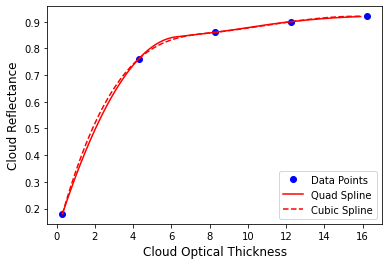

In [8]:
from scipy.interpolate import interp1d
f_quad     = interp1d(tau_data,R_data, kind='quadratic') 
R_quad   = f_quad(tau_interp)

f_cubic    = interp1d(tau_data,R_data,kind='cubic') 
R_cubic  = f_cubic(tau_interp)

fig,ax = plt.subplots()
ax.plot(tau_data,    R_data,   'bo',  label='Data Points')
ax.plot(tau_interp,    R_quad,   'r-',  label='Quad Spline')
ax.plot(tau_interp,    R_cubic ,  'r--',  label='Cubic Spline')
plt.legend(loc='lower right')
ax.set_xlabel('Cloud Optical Thickness',fontsize='large')   
ax.set_ylabel('Cloud Reflectance',fontsize='large')                   
plt.show()

---

## 4 Two-Dimensional Interpolation

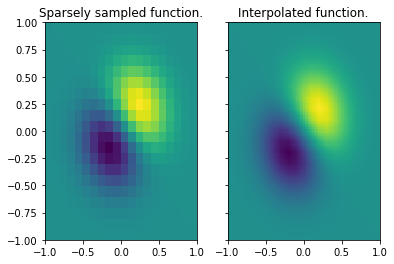

In [9]:
from scipy.interpolate import interp2d
x =  np.arange(-1,1.1,0.1)
y =  np.arange(-1,1.1,0.1)
xx, yy = np.meshgrid(x,y)
zz = (xx+yy) * np.exp(-6.0*(xx*xx+yy*yy))

xnew =  np.arange(-1,1.02,0.02)
ynew =  np.arange(-1,1.02,0.02)
xxnew, yynew = np.meshgrid(xnew,ynew)
f2d=interp2d(x, y, zz, kind='linear')
znew =f2d(xnew, ynew)

fig,ax=plt.subplots(1,2,sharey=True)
ax[0].pcolor(xx, yy, zz)
ax[0].set_title("Sparsely sampled function.")

ax[1].pcolor(xnew, ynew, znew)
ax[1].set_title("Interpolated function.")
ax[1].set_xlim([-1,1])
ax[1].set_ylim([-1,1])
plt.show()
